# experiment simulation

## Explanation

We try to simulate brutally the experiment with the following algorim:

- we define the number of measure for each shot as *N_measures*.
- than we sample *N_measures* values of the frequency from a gaussian distribution with "mean = f0" and "width = f_std".
- than we sample *N_measures* values of the *n_max* from a gaussian distribution with "mean = n_max_ideal" and "width = n_max_std", it matches to have a different amplitude (power) of the excitation beam.
- than we extract *N_measures* values from the poissonians with means equal to the lorentians evaluated in the values just sampled:

$
poiss(n,\mu) = \frac{e^{\mu(f,n_{max})}\mu(f,n_{max})^n}{n!}
$

$
\mu(f,n_{max})=n_{max}\frac{\gamma^2}{\gamma^2+f^2}
$


## Codes and results


In [117]:
from numpy.random import poisson, normal, uniform
import numpy as np
import matplotlib.pyplot as plt

In [118]:
## defining the lorentian function
def lorentian(x, n_max, Gamma, x_resonance=0):
    return n_max*(Gamma**2/((x-x_resonance)**2+Gamma**2))

In [170]:
## n_max_ideal : height of the peack of the ideal lorentian. 
n_max_ideal = 7 

## g : FWHM of the ideal lorentian.
g = 2.2*780/1013-0.6

## N_measure : number of measurment
N_measures = 1000

## f_std : standard deviation of the frequency gaussian noise.
f_std = 0.2

## n_max_std : standard deviation of the amplitude gaussian noise.
n_max_std = n_max_ideal*(5/100)

## f0_vals : values of detuning to sample all the lorentian.
f0_vals = np.linspace(-10, 10, 2000)

In [171]:
## will contain the Q and the <n> values respectively for each f0 in f0_vals.
Q = [] 
n_means = []  
stds = []

for f0 in f0_vals:
    frequences = np.linspace(f0-f_std,f0+f_std,N_measures)#uniform(f0-f_std,f0+f_std,N_measures)#normal(f0,f_std,N_measures)
    #n_maxes = normal(n_max_ideal ,n_max_std ,N_measures)

    measures = []
    for i in range(N_measures):
        measures.append(poisson(lorentian(frequences[i], n_max_ideal, g),1))
    
    mean=np.mean(measures)
    std=np.std(measures)
    Q.append((std**2)/mean-1)
    n_means.append(mean)
    stds.append(std)

/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_666/1488752640.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(f0_vals, Q, "-", color=color, label="mandel Q", marker="", linestyle="-")


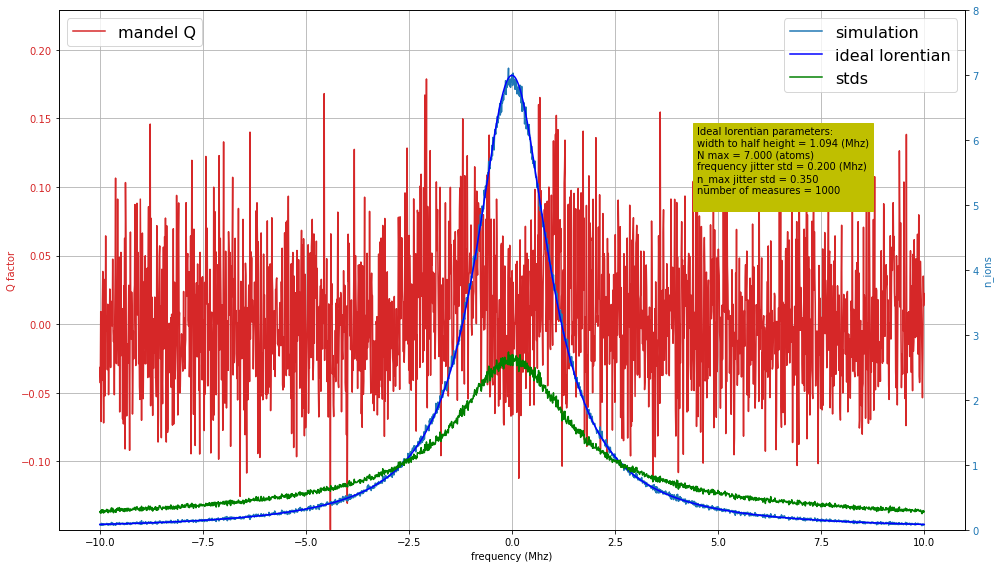

In [173]:
y=lorentian(f0_vals,n_max_ideal,g)

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
ax1.set_xlabel('frequency (Mhz)')
ax1.set_ylabel('Q factor', color=color)
ax1.plot(f0_vals, Q, "-", color=color, label="mandel Q", marker="", linestyle="-")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([min(Q),max(Q)+0.05])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('n_ions', color=color)  # we already handled the x-label with ax1
ax2.plot(f0_vals, n_means, "-", color=color, label="simulation")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,n_max_ideal+1])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()

plt.plot(f0_vals, y, c="b", label="ideal lorentian")
plt.plot(f0_vals, stds, c="g", label="stds")
ax1.legend(loc=2, fontsize=16)
ax2.legend(loc=1, fontsize=16)

text="Ideal lorentian parameters: \n"
text=text+"width to half height = %.3f (Mhz)\n" %g
text=text+"N max = %.3f (atoms)\n" %n_max_ideal
text=text+"frequency jitter std = %.3f (Mhz)\n" %f_std
text=text+"n_max jitter std = %.3f \n" %n_max_std
text=text+"number of measures = %d \n" %N_measures


ax2.text(x=4.5,y=5,s=text,backgroundcolor="y")

plt.show()

# introducing a time correlation between near frequencies.

We assume that frequency fluctuate not with a totally random regime, but the frequency we have in the next step will be correlated with the previous one.
For example we can assume a markov proces, so that the frequency in the next step will be sampled from a distribution with mean equals to the previous one. 

In [154]:
## n_max_ideal : height of the peack of the ideal lorentian. 
n_max_ideal = 8  

## g : FWHM of the ideal lorentian.
g = 1.7*780/1013-0.6

## N_measure : number of measurment
N_measures = 100

## f_std : standard deviation of the frequency gaussian noise.
f_std = 0.6

## n_max_std : standard deviation of the amplitude gaussian noise.
n_max_std = n_max_ideal*(5/100)

## f0_vals : values of detuning to sample all the lorentian.
f0_vals = np.linspace(-10, 10, 1000)

In [155]:
## will contain the Q and the <n> values respectively for each f0 in f0_vals.
Q = [] 
n_means = []  

for f0 in f0_vals:
    frequences = [normal(f0,f_std,1)]
    for i in range(N_measures-1):
        if abs(frequences[i]-f0) > f_std:
            frequences.append(normal(f0,f_std,1))
        else:
            frequences.append(normal(frequences[i],f_std/20,1))

    n_maxes = normal(n_max_ideal ,n_max_std ,N_measures)

    measures = []
    for i in range(N_measures):
        measures.append(poisson(lorentian(frequences[i], n_maxes[i], g),1))
    
    mean=np.mean(measures)
    std=np.std(measures)
    Q.append((std**2)/mean-1)
    n_means.append(mean)

/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_666/2097138858.py:21: RuntimeWarning: invalid value encountered in double_scalars
  Q.append((std**2)/mean-1)


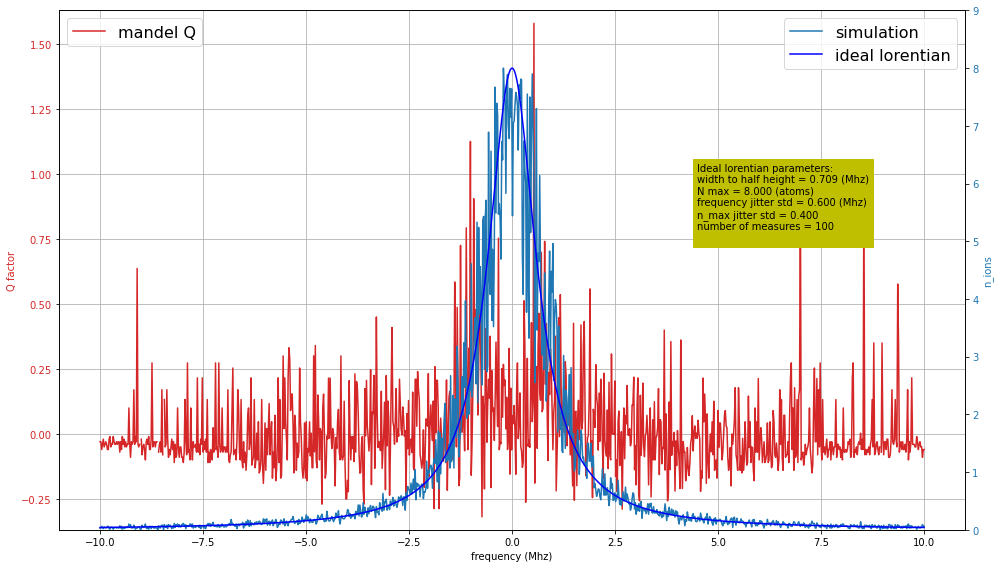

In [156]:
y=lorentian(f0_vals,n_max_ideal,g)

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
ax1.set_xlabel('frequency (Mhz)')
ax1.set_ylabel('Q factor', color=color)
ax1.plot(f0_vals, Q, "-", color=color, label="mandel Q")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([min(Q)-0.05,max(Q)+0.05])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('n_ions', color=color)  # we already handled the x-label with ax1
ax2.plot(f0_vals, n_means, "-", color=color, label="simulation")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,n_max_ideal+1])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()

plt.plot(f0_vals, y, c="b", label="ideal lorentian")
ax1.legend(loc=2, fontsize=16)
ax2.legend(loc=1, fontsize=16)

text="Ideal lorentian parameters: \n"
text=text+"width to half height = %.3f (Mhz)\n" %g
text=text+"N max = %.3f (atoms)\n" %n_max_ideal
text=text+"frequency jitter std = %.3f (Mhz)\n" %f_std
text=text+"n_max jitter std = %.3f \n" %n_max_std
text=text+"number of measures = %d \n" %N_measures


ax2.text(x=4.5,y=5,s=text,backgroundcolor="y")

plt.show()